Epoch 1/40
938/938 [==============================] - 56s 59ms/step - loss: 0.1740 - accuracy: 0.9467 - val_loss: 0.0561 - val_accuracy: 0.9813
Epoch 2/40
938/938 [==============================] - 53s 57ms/step - loss: 0.0571 - accuracy: 0.9820 - val_loss: 0.0387 - val_accuracy: 0.9869
Epoch 3/40
938/938 [==============================] - 54s 58ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.0327 - val_accuracy: 0.9893
Epoch 4/40
938/938 [==============================] - 52s 56ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0335 - val_accuracy: 0.9890
Epoch 5/40
938/938 [==============================] - 54s 57ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.0314 - val_accuracy: 0.9894
Epoch 6/40
938/938 [==============================] - 52s 56ms/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.0320 - val_accuracy: 0.9902
Epoch 7/40
938/938 [==============================] - 54s 58ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0305 - val_accuracy:

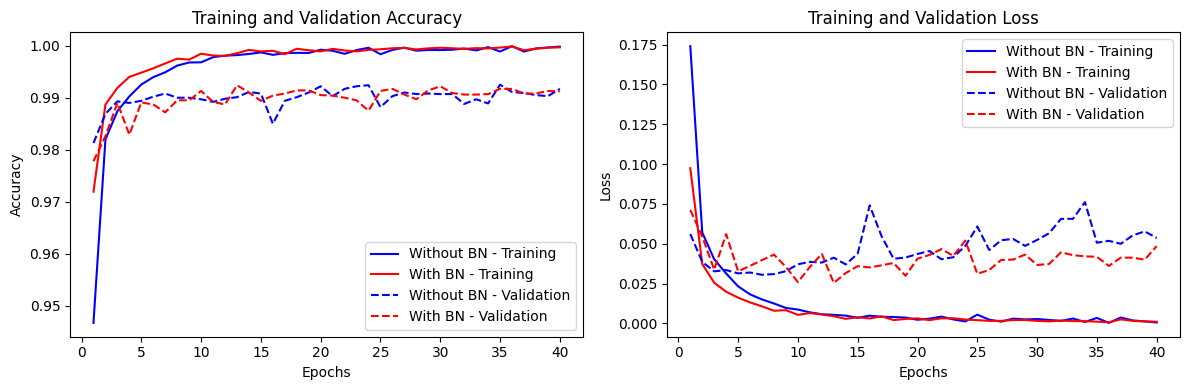

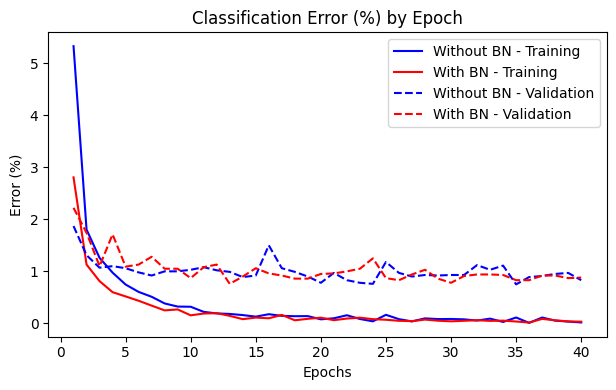

In [8]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
import matplotlib.pyplot as plt

def create_model(optimizer, use_bn=False):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    if use_bn:
        model.add(BatchNormalization())  # Batch Normalization after Conv2D
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    if use_bn:
        model.add(BatchNormalization())  # Batch Normalization after Conv2D
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    if use_bn:
        model.add(BatchNormalization())  # Batch Normalization after Dense
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0


# Train the model with and without Batch Normalization
optimizer = 'adam'
model_without_bn = create_model(optimizer)
model_with_bn = create_model(optimizer, use_bn=True)

history_without_bn = model_without_bn.fit(train_images, train_labels, epochs=40, batch_size=64, validation_data=(test_images, test_labels))
history_with_bn = model_with_bn.fit(train_images, train_labels, epochs=40, batch_size=64, validation_data=(test_images, test_labels))

# Extract accuracy and loss values
accuracy_without_bn = history_without_bn.history['accuracy']
accuracy_with_bn = history_with_bn.history['accuracy']
val_accuracy_without_bn = history_without_bn.history['val_accuracy']
val_accuracy_with_bn = history_with_bn.history['val_accuracy']
loss_without_bn = history_without_bn.history['loss']
loss_with_bn = history_with_bn.history['loss']
val_loss_without_bn = history_without_bn.history['val_loss']
val_loss_with_bn = history_with_bn.history['val_loss']

# Visualize training and validation accuracy
epochs = range(1, 41)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy_without_bn, 'b', label='Without BN - Training')
plt.plot(epochs, accuracy_with_bn, 'r', label='With BN - Training')
plt.plot(epochs, val_accuracy_without_bn, 'b--', label='Without BN - Validation')
plt.plot(epochs, val_accuracy_with_bn, 'r--', label='With BN - Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss_without_bn, 'b', label='Without BN - Training')
plt.plot(epochs, loss_with_bn, 'r', label='With BN - Training')
plt.plot(epochs, val_loss_without_bn, 'b--', label='Without BN - Validation')
plt.plot(epochs, val_loss_with_bn, 'r--', label='With BN - Validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate classification error (%) by epoch
error_without_bn = [100 * (1 - acc) for acc in accuracy_without_bn]
error_with_bn = [100 * (1 - acc) for acc in accuracy_with_bn]
val_error_without_bn = [100 * (1 - val_acc) for val_acc in val_accuracy_without_bn]
val_error_with_bn = [100 * (1 - val_acc) for val_acc in val_accuracy_with_bn]

# Visualize classification error (%) by epoch
epochs = range(1, 41)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, error_without_bn, 'b', label='Without BN - Training')
plt.plot(epochs, error_with_bn, 'r', label='With BN - Training')
plt.plot(epochs, val_error_without_bn, 'b--', label='Without BN - Validation')
plt.plot(epochs, val_error_with_bn, 'r--', label='With BN - Validation')
plt.title('Classification Error (%) by Epoch')
plt.xlabel('Epochs')
plt.ylabel('Error (%)')
plt.legend()

plt.tight_layout()
plt.show()
